In [37]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

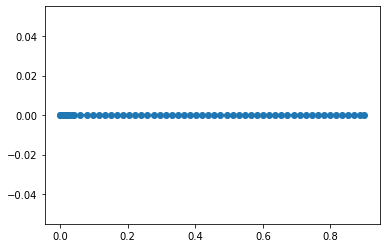

In [38]:
x = np.logspace(1,12,12,base=1.2)*0.001
nx = np.append(x,np.ones(47)*0.02)
nx = np.append(0.,nx)
nx = nx.cumsum()
nx = np.append(nx,1.)
nx *= 0.9
nx
plt.plot(nx,zeros(nx.shape),'o-')

### 根据NACA翼型厚度获得宽度曲线

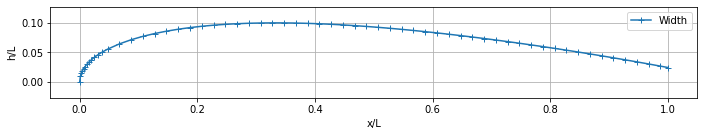

In [39]:
plt.figure(figsize=[10,2])
x,y=naca4(nx,20)
plt.plot(x/0.9,y,"+-",label="Width")
plt.grid()
plt.axis("equal")
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
plt.savefig("WidthCurve.png",dpi=300)
bb=y

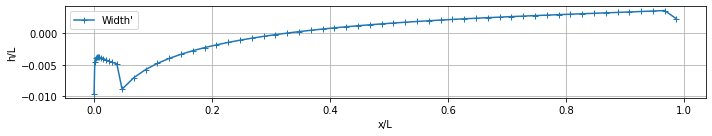

In [40]:
plt.figure(figsize=[10,2])
x,y=naca4(nx,20)
plt.plot(x[:-1]/0.9,y[:-1]-y[1:],"+-",label="Width'")
plt.grid()
#plt.axis("equal")
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
plt.savefig("WidthCurve1D.png",dpi=300)
bb=y

### 根据翼型获得高度曲线

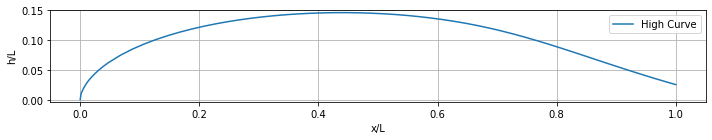

In [41]:
plt.figure(figsize=[10,2])
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
plt.plot(x/0.9,y,label="High Curve")
plt.axis("equal")
plt.grid()
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
plt.savefig("HighCurve.png",dpi=300)
aa=y


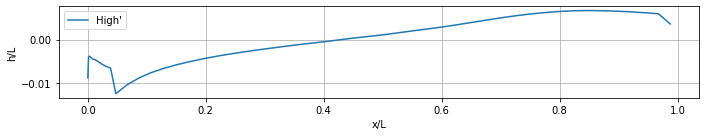

In [42]:
plt.figure(figsize=[10,2])
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
plt.plot(x[:-1]/0.9,y[:-1]-y[1:],label="High'")
#plt.axis("equal")
plt.grid()
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
plt.savefig("HighCurve1D.png",dpi=300)

In [43]:
### 根据B样条曲线确定nn参数  单组参数

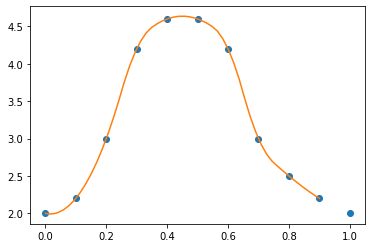

In [44]:
x=np.linspace(0,1,11)
y=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])

from scipy.interpolate import splev, splrep
s=splrep(x,y,k=2)
ny=splev(nx,s)
plt.plot(x,y,"o",nx,ny)
nn=ny

In [45]:
## 根据B样条曲线确定nn参数  两组参数

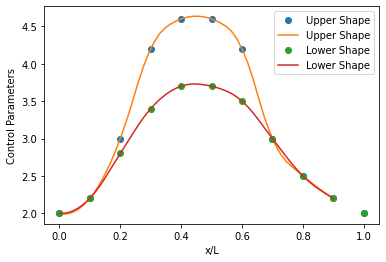

In [46]:
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x,y1,"o",nx,ny1,label="Upper Shape")
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
plt.plot(x,y2,"o",nx,ny2,label="Lower Shape")
plt.legend()
plt.xlabel("x/L")
plt.ylabel("Control Parameters")
plt.savefig("ControlParameters.png",dpi=300)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

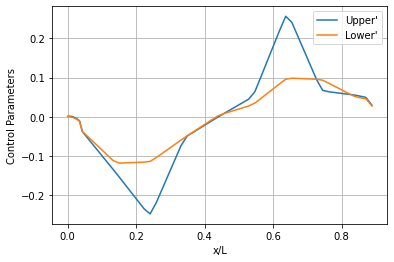

In [47]:
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(nx[:-1],ny1[:-1]-ny1[1:],label="Upper'")
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
plt.plot(nx[:-1],ny2[:-1]-ny2[1:],label="Lower'")
plt.legend()
plt.xlabel("x/L")
plt.ylabel("Control Parameters")
plt.grid()
plt.savefig("ControlParameters1D.png",dpi=300)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

(-0.006001139569722799,
 0.1260239309641788,
 -0.16082160724575892,
 0.16101781374172175)

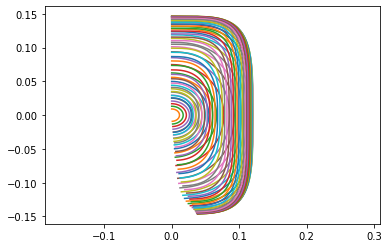

In [48]:
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    try:
        x,y=HyperEllipse(aa[idx],bb[idx]*1.2,nn[idx],psi,half=True)
        plt.plot(x[:40],y[:40])
    except:
        print(idx)
        print(aa[idx],bb[idx]*1.2,nn[idx],psi,)
plt.axis("equal")

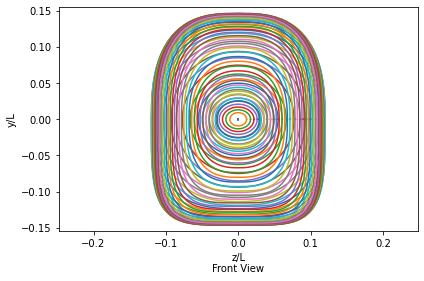

In [49]:
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    plt.plot(y,x)
plt.axis("equal")
plt.xlabel("z/L\nFront View")
plt.ylabel("y/L")
plt.tight_layout()
plt.savefig("FrontView.png",dpi=300)

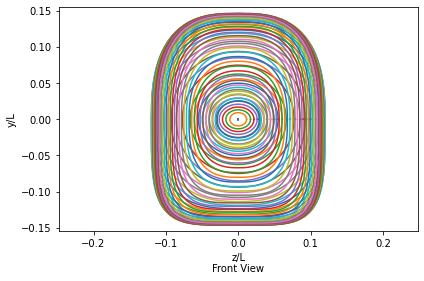

In [50]:
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    plt.plot(y,x)
plt.axis("equal")
plt.xlabel("z/L\nFront View")
plt.ylabel("y/L")
plt.tight_layout()
plt.savefig("SideView.png",dpi=300)

(-0.13202507053390158,
 0.13202507053390158,
 -0.1610276240665199,
 0.1610276240665199)

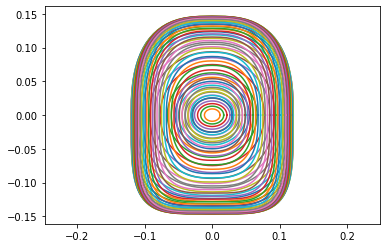

In [51]:
of = open("E:\TestFuselageData.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    plt.plot(y,x)
    for jdx, j in enumerate(y):
        of.write("%f %f %f\n"%(i*1.5,y[jdx],x[jdx]-idx*0.01))
    of.write("\n")
of.close()

plt.axis("equal")

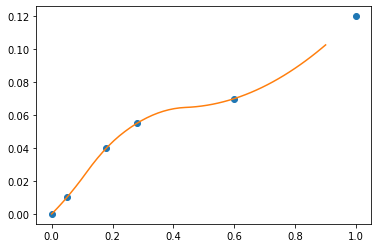

In [52]:
#自制Y曲线
x1=np.array([0, 0.05,  0.18, 0.28, 0.6,1])
y1=np.array([0, 0.01, 0.04, 0.055, 0.07,0.12])

from scipy.interpolate import splev, splrep
s1=splrep(x1,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x1,y1,"o",nx,ny1)
delta = ny1

(-0.045000000000000005,
 0.9450000000000001,
 -0.13202507053390158,
 0.13202507053390158)

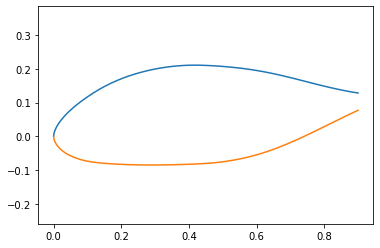

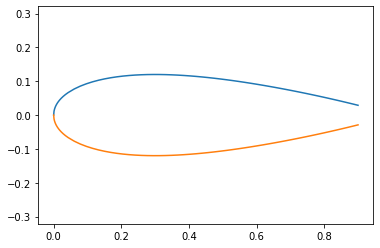

In [53]:
#显示测轮廓
psi = np.linspace(0,2*pi,81)
ymax=[]
ymin=[]
zmax=[]
zmin=[]
for idx, i in enumerate(nx):
    #print(nn4[idx])
    y,z=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    y+=delta[idx]
    ymax.append(y.max())
    ymin.append(y.min())
    zmax.append(z.max())
    zmin.append(z.min())

plt.figure()
plt.plot(nx,ymax)
plt.plot(nx,ymin)
plt.axis("equal")
plt.figure()
plt.plot(nx,zmax)
plt.plot(nx,zmin)
plt.axis("equal")

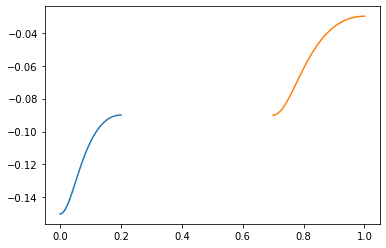

In [54]:
#x轴向竖直方向偏移。vitosinski曲线
yy = vitosinski(np.linspace(0,0.2,100),0.15,0.09,0.2)
yy2 = vitosinski(np.linspace(0,0.3,100),0.15,0.09,0.3)
yy2[0] = yy2[0]+0.7
yy2[1] = yy2[1]-0.06
plt.plot(yy[0],-yy[1])
plt.plot(yy2[0],-yy2[1])
delta = yy[1]

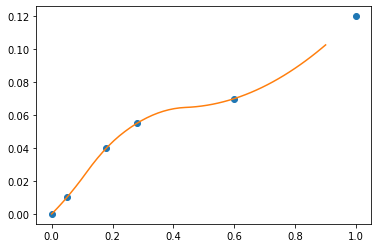

(-0.13158271349236383,
 0.13158271349236383,
 -0.1610276240665199,
 0.1610276240665199)

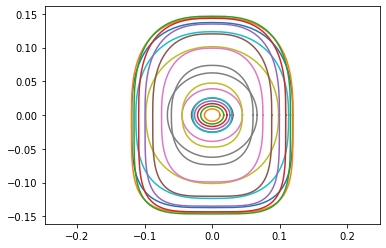

In [55]:
of = open("E:\TestFuselageData.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    if idx%4 != 0  and idx > 5:
        continue
    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    plt.plot(y,x)
    for jdx, j in enumerate(y):
        of.write("%f %f %f\n"%(i*1.5,y[jdx],x[jdx]+delta[idx]))
    of.write("\n")
of.close()
plt.axis("equal")

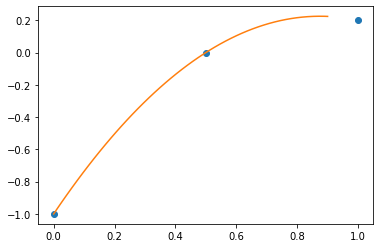

In [56]:
# 这段不记得了
x=np.array([0,0.5,1])
y1=np.array([-1,0,0.2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x,y1,"o",nx,ny1)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

In [21]:
100%3

1

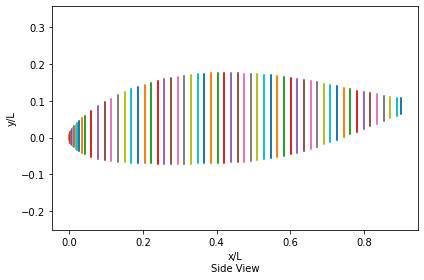

In [43]:
#of = open("E:\TestFuselageData.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])

    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    x+=delta[idx]
    plt.plot(np.ones(x.shape)*i,x/1.2)

    #of.write("\n")
#of.close()
plt.axis("equal")

plt.xlabel("x/L\nSide View")
plt.ylabel("y/L")
plt.tight_layout()
plt.savefig("SideView.png",dpi=300)

In [ ]:
#of = open("E:\TestFuselageData.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])

    x,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    x+=delta[idx]
    plt.plot(y,x)

    #of.write("\n")
#of.close()
plt.axis("equal")
plt.axis("equal")
plt.xlabel("z/L\nFront View")
plt.ylabel("y/L")
plt.tight_layout()
plt.savefig("FrontView.png",dpi=300)